In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import compartmental_models
import matplotlib.pyplot as plt
import numpy as np
from EpiModel import EpiModel
import pandas as pd

In [3]:
colors={
    'S':"#053c5e",
    'I':"#E71D36",
    'R':"#9BC53D",
    'Q':"#ff9f1c"
}
#ff9f1c
#d0cd94

In [4]:
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
#plt.rcParams.update({'font.size': 22})


SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams['figure.figsize'] = [9, 5]

# SI Model

In [5]:
beta = 0.2
SI = EpiModel()
SI.add_interaction('S', 'I', 'I', beta)
N = 100000
I0 = 10

SI.integrate(100, S=N-I0, I=I0)
SI.values_['tiempo']=SI.values_.index

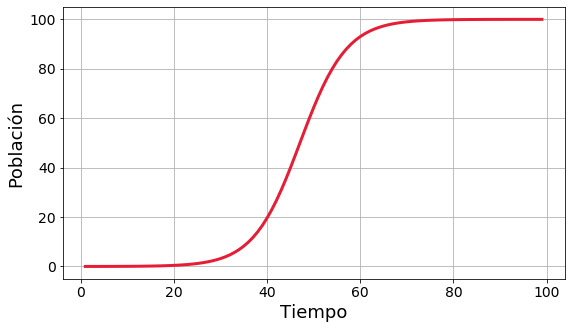

In [6]:
plt.plot(SI.values_['tiempo'], 100.0*SI.values_['I']/N, lw=3, color=colors['I'])
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.grid()
plt.savefig('SI.png', dpi=300, transparent=True)
plt.show()

In [7]:
beta = 0.4
SI2 = EpiModel()
SI2.add_interaction('S', 'I', 'I', beta)
SI2.integrate(100, S=N-I0, I=I0)
SI2.values_['tiempo']=SI.values_.index

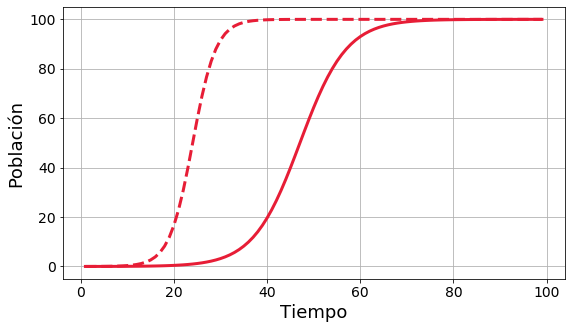

In [8]:
plt.plot(SI.values_['tiempo'], 100.0*SI.values_['I']/N, lw=3, color=colors['I'])
plt.plot(SI.values_['tiempo'], 100.0*SI2.values_['I']/N, lw=3, ls='--', color=colors['I'])
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.grid()
plt.savefig('SI2.png', dpi=300, transparent=True)
plt.show()

# SIR Model

In [9]:
beta = 0.2
mu = 0.1

SIR = EpiModel()
SIR.add_interaction('S', 'I', 'I', beta)
SIR.add_spontaneous('I', 'R', mu)

SIR.integrate(365, S=N-I0, I=I0, R=0)
SIR.values_['tiempo']=SIR.values_.index

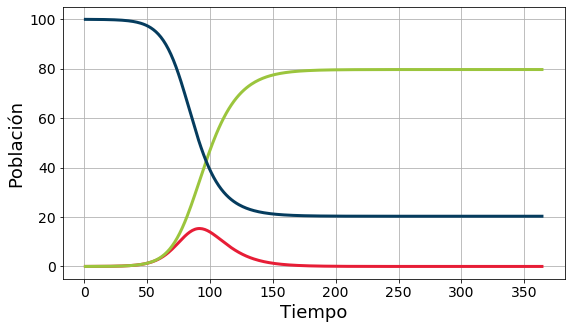

In [10]:
plt.plot(SIR.values_['tiempo'], 100.0*SIR.values_['I']/N, lw=3, color=colors['I'])
plt.plot(SIR.values_['tiempo'], 100.0*SIR.values_['R']/N, lw=3, color=colors['R'])
plt.plot(SIR.values_['tiempo'], 100.0*SIR.values_['S']/N, lw=3, color=colors['S'])
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.grid()
plt.savefig('SIR.png', dpi=300, transparent=True)
plt.show()

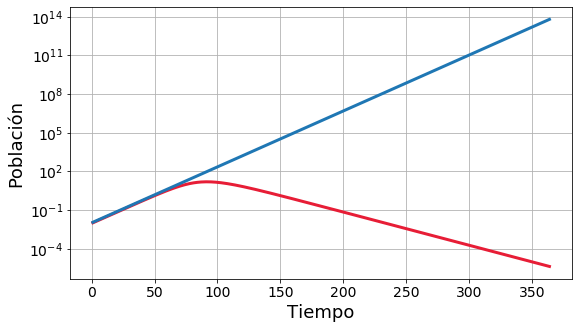

In [11]:
Ro = beta/mu
I_approx = 100.0*I0*np.exp(mu*(Ro-1)*SIR.values_['tiempo'])/N

plt.plot(SIR.values_['tiempo'], 100.0*SIR.values_['I']/N, lw=3, color=colors['I'])
plt.plot(SIR.values_['tiempo'], I_approx, lw=3)
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.yscale('log')
plt.grid()
plt.savefig('SIR_Ro.png', dpi=300, transparent=True)
plt.show()

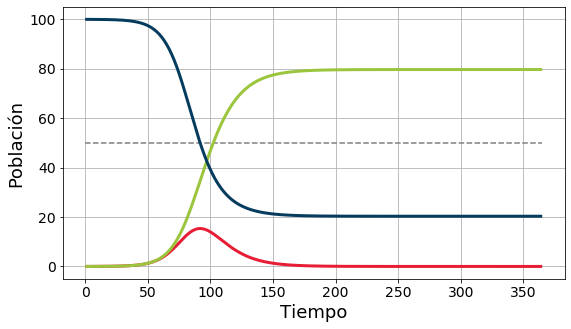

In [12]:
plt.plot(SIR.values_['tiempo'], 100.0*SIR.values_['I']/N, lw=3, color=colors['I'])
plt.plot(SIR.values_['tiempo'], 100.0*SIR.values_['R']/N, lw=3, color=colors['R'])
plt.plot(SIR.values_['tiempo'], 100.0*SIR.values_['S']/N, lw=3, color=colors['S'])
plt.hlines(100.0/Ro, 0, 365, linestyle='--', color='gray')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.grid()
plt.savefig('SIR_Ro2.png', dpi=300, transparent=True)
plt.show()

# Cuarentena

In [13]:
beta = 0.2
mu = 0.1

SIR2 = EpiModel()
SIR2.add_interaction('S', 'I', 'I', beta)
SIR2.add_spontaneous('I', 'R', mu)

SIR2.integrate(75, S=N-I0, I=I0, R=0)

In [14]:
Quarantine = EpiModel('SIR')
Quarantine.add_spontaneous('I', 'R', mu)

population = SIR2.values_.iloc[-1]
S0 = population.S
I0 = population.I
R0 = population.R

Quarantine.integrate(365-74, S=S0, I=I0, R=R0)

In [15]:
values = pd.concat([SIR2.values_, Quarantine.values_], axis=0, ignore_index=True)
values['tiempo']=values.index

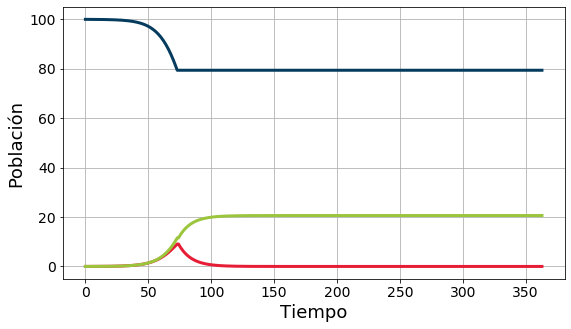

In [16]:
plt.plot(values['tiempo'], 100.0*values['I']/N, lw=3, color=colors['I'])
plt.plot(values['tiempo'], 100.0*values['R']/N, lw=3, color=colors['R'])
plt.plot(values['tiempo'], 100.0*values['S']/N, lw=3, color=colors['S'])
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.grid()
plt.savefig('SIR_cuarentena1.png', dpi=300, transparent=True)
plt.show()

In [17]:
beta = 0.2/4 # Reduce R0 by 4.
mu = 0.1

Quarantine2 = EpiModel()
Quarantine2.add_interaction('S', 'I', 'I', beta)
Quarantine2.add_spontaneous('I', 'R', mu)

Quarantine2.integrate(365-74, S=S0, I=I0, R=R0)

values2 = pd.concat([SIR2.values_, Quarantine2.values_], axis=0, ignore_index=True)
values2['tiempo']=values2.index

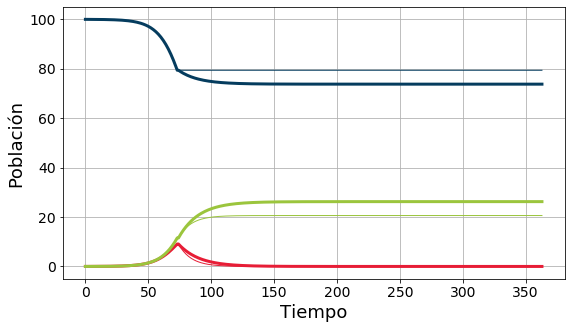

In [18]:
plt.plot(values['tiempo'], 100.0*values['I']/N,lw=1, linestyle='-', c=colors['I'])
plt.plot(values['tiempo'], 100.0*values['R']/N, lw=1, linestyle='-', c=colors['R'])
plt.plot(values['tiempo'], 100.0*values['S']/N, lw=1, linestyle='-', c=colors['S'])
plt.plot(values2['tiempo'], 100.0*values2['I']/N, lw=3, c=colors['I'])
plt.plot(values2['tiempo'], 100.0*values2['R']/N, lw=3, c=colors['R'])
plt.plot(values2['tiempo'], 100.0*values2['S']/N, lw=3,c=colors['S'])
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.grid()
plt.savefig('SIR_cuarentena2.png', dpi=300, transparent=True)
plt.show()

In [19]:
population = values2.iloc[100]
S0 = population.S
I0 = population.I
R0 = population.R


SIR2.integrate(365-99, S=S0, I=I0, R=R0)

values3 = values2.iloc[:100].copy()
values3 = pd.concat([values3, SIR2.values_], axis=0, ignore_index=True)
values3['tiempo']=values3.index

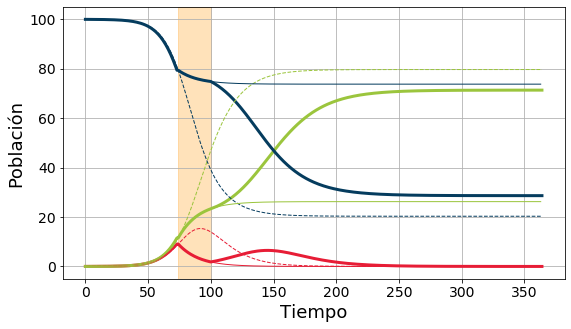

In [20]:
fig, ax = plt.subplots(1)
ax.plot(values3['tiempo'], 100.0*values3['I']/N, lw=3, c=colors['I'])
ax.plot(values3['tiempo'], 100.0*values3['R']/N, lw=3, c=colors['R'])
ax.plot(values3['tiempo'], 100.0*values3['S']/N, lw=3, c=colors['S'])

plt.plot(SIR.values_['tiempo'], 100.0*SIR.values_['I']/N, lw=1, ls='--', c=colors['I'])
plt.plot(SIR.values_['tiempo'], 100.0*SIR.values_['R']/N, lw=1, ls='--', c=colors['R'])
plt.plot(SIR.values_['tiempo'], 100.0*SIR.values_['S']/N, lw=1, ls='--', c=colors['S'])

plt.plot(values2['tiempo'], 100.0*values2['I']/N, lw=1, c=colors['I'])
plt.plot(values2['tiempo'], 100.0*values2['R']/N, lw=1, c=colors['R'])
plt.plot(values2['tiempo'], 100.0*values2['S']/N, lw=1,c=colors['S'])

ax.axvspan(xmin=74, xmax=100, alpha=0.3, color=colors['Q'])

ax.set_xlabel('Tiempo')
ax.set_ylabel('Población')
ax.grid()

plt.savefig('SIR_cuarentena_3.png', dpi=300, transparent=True)
plt.show()

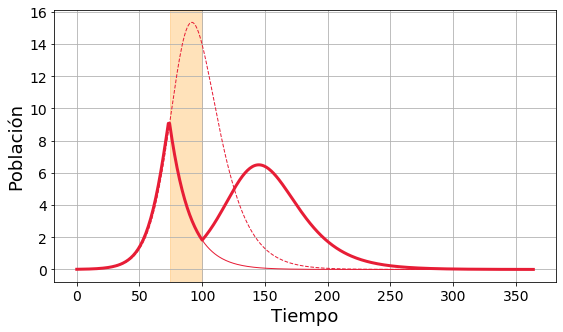

In [21]:
fig, ax = plt.subplots(1)

ax.plot(values3['tiempo'], 100.0*values3['I']/N, lw=3, c=colors['I'])
plt.plot(SIR.values_['tiempo'], 100.0*SIR.values_['I']/N, lw=1, ls='--', c=colors['I'])
plt.plot(values2['tiempo'], 100.0*values2['I']/N, lw=1, c=colors['I'])

ax.axvspan(xmin=74, xmax=100, alpha=0.3, color=colors['Q'])

ax.set_xlabel('Tiempo')
ax.set_ylabel('Población')
ax.grid()

plt.savefig('SIR_cuarentena_4.png', dpi=300, transparent=True)
plt.show()